# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

In [5]:
# Fetch the Ethereum news articles
eth_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

In [6]:
# Function to create a dataframe for Bitcoin and Ethereum News
def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [7]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [8]:
def get_sentiment_df(news_df):
    title_sent = {
        "title_compound": [],
        "title_pos": [],
        "title_neu": [],
        "title_neg": [],
        "title_sent": [],
    }
    text_sent = {
        "text_compound": [],
        "text_pos": [],
        "text_neu": [],
        "text_neg": [],
        "text_sent": [],
    }

    # Get sentiment for the text and the title
    for index, row in news_df.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_sent["title_compound"].append(title_sentiment["compound"])
            title_sent["title_pos"].append(title_sentiment["pos"])
            title_sent["title_neu"].append(title_sentiment["neu"])
            title_sent["title_neg"].append(title_sentiment["neg"])
            title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

            text_sentiment = analyzer.polarity_scores(row["text"])
            text_sent["text_compound"].append(text_sentiment["compound"])
            text_sent["text_pos"].append(text_sentiment["pos"])
            text_sent["text_neu"].append(text_sentiment["neu"])
            text_sent["text_neg"].append(text_sentiment["neg"])
            text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
        except AttributeError:
            pass

    # Attaching sentiment columns to the News DataFrame
    title_sentiment_df = pd.DataFrame(title_sent)
    text_sentiment_df = pd.DataFrame(text_sent)
    return_df = news_df.copy().join(title_sentiment_df).join(text_sentiment_df)
    return return_df

In [9]:
# Create the Bitcoin sentiment scores DataFrame
#First create the Bitcoin News DF
bitcoin_en_df = create_df(bitcoin_news_en["articles"])
#Then add the 
bitcoin_en_df = get_sentiment_df(bitcoin_en_df)
bitcoin_en_df

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,New York passes a bill to limit bitcoin mining,New York lawmakers have passed a bill\r\n that...,New York lawmakers have passed a bill\r\n that...,2022-06-03,0.0000,0.000,1.000,0.000,0,-0.5574,0.000,0.902,0.098,-1
1,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...","Rapper and entrepreneur Shawn Carter, better k...",2022-06-09,0.0000,0.000,1.000,0.000,0,0.4404,0.077,0.923,0.000,1
2,Bitcoin Wasn't as Decentralized or Anonymous a...,A new study on bitcoin calls into question whe...,A new study on bitcoin calls into question whe...,2022-06-08,0.0000,0.000,1.000,0.000,0,0.5267,0.124,0.876,0.000,1
3,Why the Central African Republic adopted Bitcoin,Some 90% of people in the Central African Repu...,"Image caption, President Faustin-Archange Toua...",2022-06-05,0.0000,0.000,1.000,0.000,0,0.5106,0.164,0.836,0.000,1
4,Chipotle now accepts cryptocurrency payments,You can now reportedly pay for your burritos a...,You can now reportedly pay for your burritos a...,2022-06-02,0.3182,0.365,0.635,0.000,1,-0.1027,0.000,0.960,0.040,-1
5,El Salvador: The country where you can buy any...,The cryptocurrency crash is hurting many inves...,By Joe TidyCyber reporter \r\nCryptocurrencies...,2022-06-16,0.0000,0.000,1.000,0.000,0,0.2960,0.134,0.792,0.074,1
6,El Salvador's Bitcoin investment suffers amid ...,El Salvador has embraced Bitcoin like no other...,(CNN)El Salvador has embraced Bitcoin like no ...,2022-06-15,-0.4767,0.000,0.693,0.307,-1,0.1027,0.087,0.867,0.046,1
7,Luna Foundation Tried to Prop Up Terra’s Crumb...,"As a kid, I remember when my father tried to u...","As a kid, I remember when my father tried to u...",2022-05-16,-0.6652,0.000,0.782,0.218,-1,0.3818,0.114,0.833,0.052,1
8,Chipotle Lovers Can Now Buy Burritos With Bitc...,Customers at Chipotle will now be able to pay ...,Customers at Chipotle will now be able to pay ...,2022-06-02,0.5267,0.236,0.764,0.000,1,0.3182,0.077,0.883,0.040,1
9,DeFi lending giant Celsius halts withdrawals,Celsius is a decentralized finance platform th...,Celsius has not said what it plans to do next\...,2022-06-13,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0


In [10]:
# Create the Ethereum sentiment scores DataFrame
ethereum_en_df = create_df(eth_news_en["articles"])
ethereum_en_df = get_sentiment_df(ethereum_en_df)
ethereum_en_df

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,GameStop Dunks Its Head Into the Crypto Kiddie...,GameStop has officially thrown itself headlong...,GameStop has officially thrown itself headlong...,2022-05-23,0.0000,0.000,1.000,0.000,0,-0.1027,0.000,0.960,0.040,-1
1,GameStop Launching Digital Wallet for Cryptocu...,The self-custodial Ethereum wallet will have i...,GameStop is going all-in on crypto. The video ...,2022-05-23,0.0000,0.000,1.000,0.000,0,0.1280,0.046,0.954,0.000,1
2,PayPal Lets Users Transfer Bitcoin and Ethereu...,PayPal announced on Tuesday that the service n...,The ability to conduct external transfers on P...,2022-06-07,0.0000,0.000,1.000,0.000,0,0.3182,0.059,0.941,0.000,1
3,MoonDAO Will Pick 2 of the Next Blue Origin As...,A community of cryptocurrency enthusiasts crow...,"A decentralized autonomous organization, or DA...",2022-06-09,0.4019,0.162,0.838,0.000,1,0.5859,0.134,0.866,0.000,1
4,It’s Time To Get Interested In Ethereum Again,The Winklevoss twins are cutting the staff at ...,"Crypto Winter It May Be, But Ethereum Looks Li...",2022-06-09,0.4019,0.278,0.722,0.000,1,0.3612,0.081,0.875,0.044,1
5,New York passes a bill to limit bitcoin mining,New York lawmakers have passed a bill\r\n that...,New York lawmakers have passed a bill\r\n that...,2022-06-03,0.0000,0.000,1.000,0.000,0,-0.5574,0.000,0.902,0.098,-1
6,'Pay more attention' Ethereum co-founder says ...,Ethereum's co-founder Gavin Wood said cryptocu...,"DAVOS, Switzerland, May 25 (Reuters) - Ethereu...",2022-05-25,-0.4767,0.000,0.661,0.339,-1,0.0258,0.034,0.966,0.000,0
7,"Report: 'Nvidia's LHR Limiter Has Fallen, But ...",Slashdot reader Hmmmmmm shared this report fro...,When Nvidia launched its Ampere Lite Hash Rate...,2022-05-15,0.3311,0.242,0.622,0.136,1,-0.3818,0.069,0.847,0.085,-1
8,"Crypto Platform Coinbase Cuts More Than 1,000 ...",The crypto roller coaster ride continues to pl...,The crypto roller coaster ride continues to pl...,2022-06-14,-0.2960,0.000,0.761,0.239,-1,0.0000,0.000,1.000,0.000,0
9,Bitcoin gains over 5% to $31441.76 - Reuters,"Bitcoin rose 5.2% to $31,441.76 at 2000 GMT on...","June 6 (Reuters) - Bitcoin rose 5.2% to $31,44...",2022-06-06,0.3400,0.286,0.714,0.000,1,0.0000,0.000,1.000,0.000,0


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.057950,0.065900,0.860050,0.074050,-0.050000,0.016715,0.065600,0.876800,0.057650,0.150000
std,0.312299,0.110157,0.145621,0.121088,0.759155,0.398865,0.061384,0.092058,0.068859,0.933302
min,-0.665200,0.000000,0.635000,0.000000,-1.000000,-0.859300,0.000000,0.646000,0.000000,-1.000000
25%,-0.307000,0.000000,0.731250,0.000000,-1.000000,-0.317450,0.000000,0.835250,0.000000,-1.000000
50%,0.000000,0.000000,0.889500,0.000000,0.000000,0.051350,0.065500,0.881000,0.049000,0.500000
75%,0.050575,0.108750,1.000000,0.175000,0.250000,0.334100,0.116500,0.932750,0.083250,1.000000
max,0.526700,0.365000,1.000000,0.344000,1.000000,0.526700,0.187000,1.000000,0.300000,1.000000


In [12]:
# Describe the Ethereum Sentiment
ethereum_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,-0.112040,0.058950,0.801950,0.13910,-0.200000,-0.037305,0.04200,0.906900,0.051150,-0.050000
std,0.359118,0.107338,0.198781,0.19083,0.767772,0.405662,0.04527,0.084171,0.085919,0.944513
min,-0.908100,0.000000,0.361000,0.00000,-1.000000,-0.948500,0.00000,0.628000,0.000000,-1.000000
25%,-0.341175,0.000000,0.651250,0.00000,-1.000000,-0.381800,0.00000,0.877250,0.000000,-1.000000
50%,0.000000,0.000000,0.800500,0.00000,0.000000,0.000000,0.03800,0.925000,0.020000,0.000000
75%,0.000000,0.040500,1.000000,0.23975,0.000000,0.328950,0.07650,0.955750,0.077500,1.000000
max,0.401900,0.286000,1.000000,0.63900,1.000000,0.585900,0.13400,1.000000,0.372000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score overall considering both news title and text.  Specifically Bitcoin has the mean postive score of 0.065 compared to 0.042 of Ethereum overall.

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score for the title but Ethereum has the highest compound score for the text.

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score for both title and text.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'would', 'whether', 'char', 'ha'}

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    # Define the regex parameters
    regex = re.compile("[^a-zA-Z ]")

    # Apply regex parameters to article
    clean_text = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(clean_text)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    
        
    return tokens

In [16]:
# Create a new tokens column for Bitcoin
bitcoin_en_df["tokens"] = bitcoin_en_df['text'].apply(lambda x: tokenizer(x))
bitcoin_en_df

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,New York passes a bill to limit bitcoin mining,New York lawmakers have passed a bill\r\n that...,New York lawmakers have passed a bill\r\n that...,2022-06-03,0.0000,0.000,1.000,0.000,0,-0.5574,0.000,0.902,0.098,-1,"[new, york, lawmaker, passed, bill, temporaril..."
1,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...","Rapper and entrepreneur Shawn Carter, better k...",2022-06-09,0.0000,0.000,1.000,0.000,0,0.4404,0.077,0.923,0.000,1,"[rapper, entrepreneur, shawn, carter, better, ..."
2,Bitcoin Wasn't as Decentralized or Anonymous a...,A new study on bitcoin calls into question whe...,A new study on bitcoin calls into question whe...,2022-06-08,0.0000,0.000,1.000,0.000,0,0.5267,0.124,0.876,0.000,1,"[new, study, bitcoin, call, question, digital,..."
3,Why the Central African Republic adopted Bitcoin,Some 90% of people in the Central African Repu...,"Image caption, President Faustin-Archange Toua...",2022-06-05,0.0000,0.000,1.000,0.000,0,0.5106,0.164,0.836,0.000,1,"[image, caption, president, faustinarchange, t..."
4,Chipotle now accepts cryptocurrency payments,You can now reportedly pay for your burritos a...,You can now reportedly pay for your burritos a...,2022-06-02,0.3182,0.365,0.635,0.000,1,-0.1027,0.000,0.960,0.040,-1,"[reportedly, pay, burrito, taco, bitcoin, digi..."
5,El Salvador: The country where you can buy any...,The cryptocurrency crash is hurting many inves...,By Joe TidyCyber reporter \r\nCryptocurrencies...,2022-06-16,0.0000,0.000,1.000,0.000,0,0.2960,0.134,0.792,0.074,1,"[joe, tidycyber, reporter, cryptocurrencies, c..."
6,El Salvador's Bitcoin investment suffers amid ...,El Salvador has embraced Bitcoin like no other...,(CNN)El Salvador has embraced Bitcoin like no ...,2022-06-15,-0.4767,0.000,0.693,0.307,-1,0.1027,0.087,0.867,0.046,1,"[cnnel, salvador, embraced, bitcoin, like, cou..."
7,Luna Foundation Tried to Prop Up Terra’s Crumb...,"As a kid, I remember when my father tried to u...","As a kid, I remember when my father tried to u...",2022-05-16,-0.6652,0.000,0.782,0.218,-1,0.3818,0.114,0.833,0.052,1,"[kid, remember, father, tried, use, broom, han..."
8,Chipotle Lovers Can Now Buy Burritos With Bitc...,Customers at Chipotle will now be able to pay ...,Customers at Chipotle will now be able to pay ...,2022-06-02,0.5267,0.236,0.764,0.000,1,0.3182,0.077,0.883,0.040,1,"[customers, chipotle, able, pay, burrito, cryp..."
9,DeFi lending giant Celsius halts withdrawals,Celsius is a decentralized finance platform th...,Celsius has not said what it plans to do next\...,2022-06-13,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[celsius, plan, nextexhibition, experience, zo..."


In [17]:
# Create a new tokens column for Ethereum
ethereum_en_df["tokens"] = ethereum_en_df['text'].apply(lambda x: tokenizer(x))
ethereum_en_df

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,GameStop Dunks Its Head Into the Crypto Kiddie...,GameStop has officially thrown itself headlong...,GameStop has officially thrown itself headlong...,2022-05-23,0.0000,0.000,1.000,0.000,0,-0.1027,0.000,0.960,0.040,-1,"[gamestop, officially, thrown, headlong, web, ..."
1,GameStop Launching Digital Wallet for Cryptocu...,The self-custodial Ethereum wallet will have i...,GameStop is going all-in on crypto. The video ...,2022-05-23,0.0000,0.000,1.000,0.000,0,0.1280,0.046,0.954,0.000,1,"[gamestop, going, allin, crypto, video, game, ..."
2,PayPal Lets Users Transfer Bitcoin and Ethereu...,PayPal announced on Tuesday that the service n...,The ability to conduct external transfers on P...,2022-06-07,0.0000,0.000,1.000,0.000,0,0.3182,0.059,0.941,0.000,1,"[ability, conduct, external, transfer, paypals..."
3,MoonDAO Will Pick 2 of the Next Blue Origin As...,A community of cryptocurrency enthusiasts crow...,"A decentralized autonomous organization, or DA...",2022-06-09,0.4019,0.162,0.838,0.000,1,0.5859,0.134,0.866,0.000,1,"[decentralized, autonomous, organization, dao,..."
4,It’s Time To Get Interested In Ethereum Again,The Winklevoss twins are cutting the staff at ...,"Crypto Winter It May Be, But Ethereum Looks Li...",2022-06-09,0.4019,0.278,0.722,0.000,1,0.3612,0.081,0.875,0.044,1,"[crypto, winter, may, ethereum, looks, like, b..."
5,New York passes a bill to limit bitcoin mining,New York lawmakers have passed a bill\r\n that...,New York lawmakers have passed a bill\r\n that...,2022-06-03,0.0000,0.000,1.000,0.000,0,-0.5574,0.000,0.902,0.098,-1,"[new, york, lawmaker, passed, bill, temporaril..."
6,'Pay more attention' Ethereum co-founder says ...,Ethereum's co-founder Gavin Wood said cryptocu...,"DAVOS, Switzerland, May 25 (Reuters) - Ethereu...",2022-05-25,-0.4767,0.000,0.661,0.339,-1,0.0258,0.034,0.966,0.000,0,"[davos, switzerland, may, reuters, ethereums, ..."
7,"Report: 'Nvidia's LHR Limiter Has Fallen, But ...",Slashdot reader Hmmmmmm shared this report fro...,When Nvidia launched its Ampere Lite Hash Rate...,2022-05-15,0.3311,0.242,0.622,0.136,1,-0.3818,0.069,0.847,0.085,-1,"[nvidia, launched, ampere, lite, hash, rate, l..."
8,"Crypto Platform Coinbase Cuts More Than 1,000 ...",The crypto roller coaster ride continues to pl...,The crypto roller coaster ride continues to pl...,2022-06-14,-0.2960,0.000,0.761,0.239,-1,0.0000,0.000,1.000,0.000,0,"[crypto, roller, coaster, ride, continues, plu..."
9,Bitcoin gains over 5% to $31441.76 - Reuters,"Bitcoin rose 5.2% to $31,441.76 at 2000 GMT on...","June 6 (Reuters) - Bitcoin rose 5.2% to $31,44...",2022-06-06,0.3400,0.286,0.714,0.000,1,0.0000,0.000,1.000,0.000,0,"[june, reuters, bitcoin, rose, gmt, monday, ad..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Concatenate all of the Bitcoin tokens together
bitcoin_words = []
for index, row in bitcoin_en_df.iterrows():
    bitcoin_words.extend(row["tokens"])

In [20]:
# Concatenate all of the Ethereum tokens together
ethereum_words = []
for index, row in ethereum_en_df.iterrows():
    ethereum_words.extend(row["tokens"])
    


In [21]:
# Generate the Bitcoin N-grams where N=2
bitcoin_bigrams = ngrams(bitcoin_words, n=2)
top_10_bitcoin_bigrams = dict(Counter(bitcoin_bigrams).most_common(10))
bitcoin_bigrams_df = pd.DataFrame(list(top_10_bitcoin_bigrams.items()), columns=['bigram', 'count'])
bitcoin_bigrams_df

,bigram,count
0,"(june, reuters)",3
1,"(reuters, bitcoin)",3
2,"(new, blockchain)",3
3,"(seth, greens)",3
4,"(bitcoin, mining)",2
5,"(digital, currency)",2
6,"(legal, tender)",2
7,"(pay, burrito)",2
8,"(gmt, monday)",2
9,"(world, biggest)",2


In [22]:
# Generate the Ethereum N-grams where N=2
ethereum_bigrams = ngrams(ethereum_words, n=2)
top_10_ethereum_bigrams = dict(Counter(ethereum_bigrams).most_common(10))
ethereum_bigrams_df = pd.DataFrame(list(top_10_ethereum_bigrams.items()), columns=['bigram', 'count'])
ethereum_bigrams_df

,bigram,count
0,"(crypto, winter)",2
1,"(mining, operation)",2
2,"(largest, cryptocurrency)",2
3,"(june, reuters)",2
4,"(reuters, bitcoin)",2
5,"(gmt, monday)",2
6,"(world, biggest)",2
7,"(biggest, bestknown)",2
8,"(bestknown, cryptocurrency)",2
9,"(cryptocurrency, boom)",2


In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
top_10_bitcoin_words = dict(token_count(bitcoin_words, 10))
bitcoin_top10_words_df = pd.DataFrame(list(top_10_bitcoin_words.items()), columns=['word', 'count'])
bitcoin_top10_words_df

,word,count
0,bitcoin,15
1,new,8
2,token,6
3,blockchain,6
4,digital,4
5,biggest,4
6,cryptocurrencies,4
7,cryptocurrency,4
8,reuters,4
9,world,4


In [25]:
# Use token_count to get the top 10 words for Ethereum
top_10_ethereum_words = dict(token_count(ethereum_words, 10))
ethereum_top10_words_df = pd.DataFrame(list(top_10_ethereum_words.items()), columns=['word', 'count'])
ethereum_top10_words_df

,word,count
0,cryptocurrency,10
1,crypto,5
2,new,4
3,ethereum,4
4,market,4
5,year,4
6,nft,4
7,video,3
8,digital,3
9,monday,3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

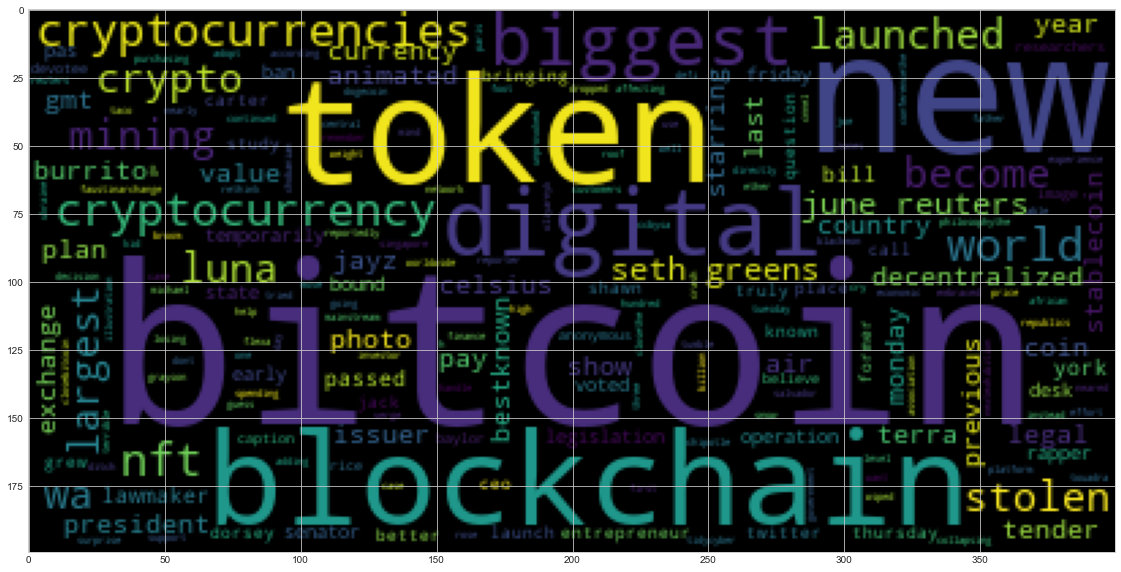

In [27]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(' '.join(bitcoin_words))
plt.imshow(bitcoin_wc)

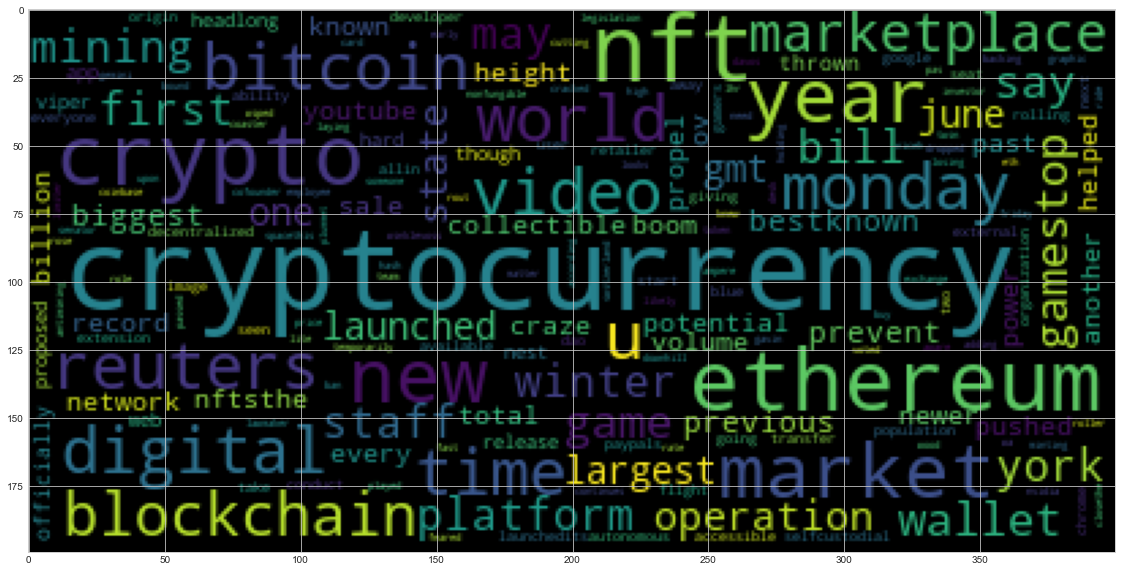

In [28]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(' '.join(ethereum_words))
plt.imshow(ethereum_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 1.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [32]:
# Concatenate all of the Bitcoin text together
bitcoin_texts = ""
for index, row in bitcoin_en_df.iterrows():
    bitcoin_texts = bitcoin_texts + " " +  row["text"]

 

In [35]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_texts)   

In [39]:
# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin Named Entity Recognition"


In [40]:
# Render the visualization
displacy.render(bitcoin_doc, style="ent")

In [48]:
# List all Entities
bitcoin_entities = [ent.text for ent in bitcoin_doc.ents]
bitcoin_entities

['New York',
 'Friday',
 '36-27',
 'Rapper',
 'Shawn Carter',
 'Jay-Z',
 'Thursday',
 'Jay-Z',
 'Jack Dorsey',
 'Faustin-Archange Touadéra',
 "The Central African Republic's",
 'Bitcoin',
 'first',
 'Joe TidyCyber',
 'this week',
 'billions',
 'Bitcoin',
 'Salvador',
 'hundreds',
 'last year',
 'nearly three feet',
 'The Paris NFT Day',
 'The Celsius Network',
 'DeFi',
 '] Photo Illustration',
 'Grayson Blackmon',
 'Oliyarnyk / CC-BY-SA-4.0',
 'Michael Chobanian',
 'the Blockchain Association of Ukraine',
 'Reuters',
 '5.2%',
 '31,441.76',
 'GMT',
 'Monday',
 '1,552.78',
 '34.8%',
 'year',
 'Reuters',
 '12.1%',
 '23,366',
 'GMT',
 'Monday',
 '3,218.95',
 '51.6%',
 'June 14',
 'Reuters',
 'Tuesday',
 'MicroStrategy Inc',
 'May 24',
 'Reuters',
 'its ninth week',
 'today',
 "Seth Green's",
 'NFT',
 'two',
 "Seth Green's",
 'Nike',
 "Seth Green's",
 'NFT',
 'Sam Bankman-Fried',
 'the digital asset exchange',
 'FTX',
 'Riot Blockchain',
 'Marathon Digital Holdings']

---

### Ethereum NER

In [45]:
# Concatenate all of the Ethereum text together
ethereum_texts = ""
for index, row in ethereum_en_df.iterrows():
    ethereum_texts = ethereum_texts + " " +  row["text"]

In [50]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_texts)  

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum Named Entity Recognition"

In [51]:
# Render the visualization
displacy.render(ethereum_doc, style="ent")

In [52]:
# List all Entities
ethereum_entities = [ent.text for ent in ethereum_doc.ents]
ethereum_entities

['web3',
 'Ethereum',
 'Monday',
 'Google Chrome',
 'PayPal',
 'today',
 'U.S.',
 'DAO',
 'two',
 'Blue Origin',
 'first',
 'Gemini',
 'Ethereum (Cryptocurrency',
 '+3614',
 'New York',
 'Friday',
 '36-27',
 'Switzerland',
 'May 25',
 'Reuters',
 'Gavin Wood',
 'Nvidia',
 'Ampere Lite Hash Rate',
 'LHR',
 'Ethereum',
 '18%',
 'about 1,100',
 'Reuters',
 '5.2%',
 '31,441.76',
 'GMT',
 'Monday',
 '1,552.78',
 '34.8%',
 'year',
 'Reuters',
 '12.1%',
 '23,366',
 'GMT',
 'Monday',
 '3,218.95',
 '51.6%',
 'Buterin',
 'AI',
 'Eliezer Yudkowsky',
 'YouTube',
 'Elon Musk',
 'YouTube',
 'the past few years',
 'NFT',
 '$29 billion',
 'several years ago',
 'Kim Kardashian',
 'Floyd Mayweather',
 'NBA',
 'Paul Pierce',
 'Ether',
 'NFT',
 'NFT',
 'Solana',
 'third',
 '10%',
 'Wednesday',
 'the past few years',
 'NFT',
 '$29 billion',
 '6',
 '6',
 "New York's"]

---